# Package Import

In [790]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import xgboost as xgb

# sns.set_style('darkgrid')

# %matplotlib inline

# Data Import

In [791]:
df=pd.read_csv("C:/Users/Aviva/Desktop/NLP/data/Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Analyze the data

In [792]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [793]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [794]:
for col in df.select_dtypes(include='object').columns:
    
    print(f"{col:25} ---> {df[col].nunique():15} unique values")

airline                   --->               6 unique values
flight                    --->            1561 unique values
source_city               --->               6 unique values
departure_time            --->               6 unique values
stops                     --->               3 unique values
arrival_time              --->               6 unique values
destination_city          --->               6 unique values
class                     --->               2 unique values


In [795]:
df.groupby('class')['price'].mean()

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

### search for outlier in the data

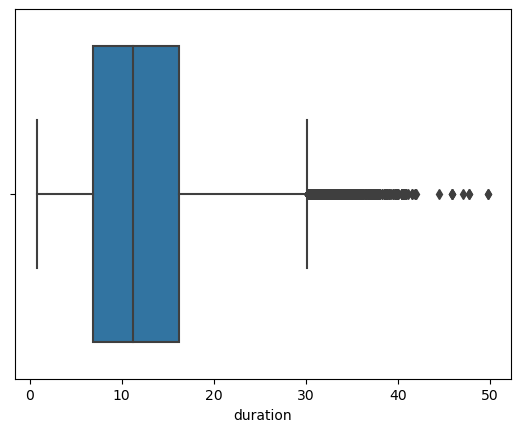

In [796]:
feature = "duration"
sns.boxplot(data=df, x=feature)

# Show the plot
plt.show()

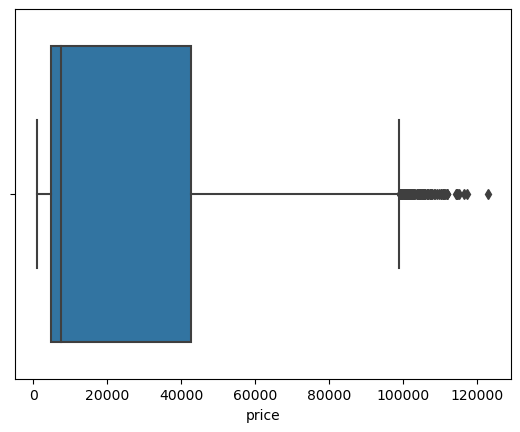

In [797]:
feature = "price"
sns.boxplot(data=df, x=feature)

# Show the plot
plt.show()

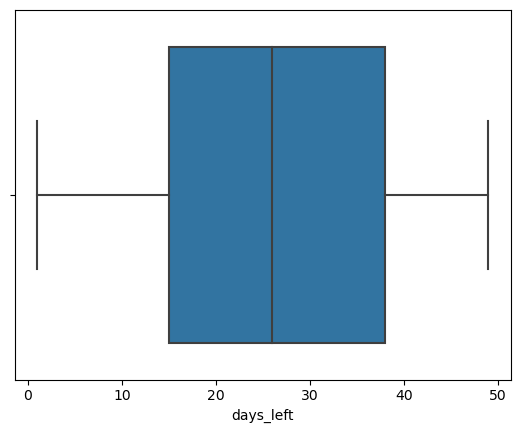

In [798]:
feature = "days_left"
sns.boxplot(data=df, x=feature)

# Show the plot
plt.show()

In [799]:
# print outliers
outliers_price = df[df['price'] > 115000].index
outliers = df[df['duration'] > 45].index
outliers = outliers.append(outliers_price)
outliers[:]
df.loc[outliers[:], :]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
119508,119508,Air_India,AI-610,Bangalore,Evening,one,Evening,Chennai,Economy,47.75,47,7461
193889,193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
193926,193926,Vistara,UK-822,Chennai,Morning,one,Morning,Bangalore,Economy,47.08,3,17223
194141,194141,Air_India,AI-429,Chennai,Afternoon,two_or_more,Morning,Bangalore,Economy,45.83,6,12813
194359,194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538
194650,194650,Air_India,AI-429,Chennai,Afternoon,two_or_more,Morning,Bangalore,Economy,45.83,13,12813
261152,261152,Air_India,AI-610,Bangalore,Evening,one,Evening,Chennai,Business,47.75,47,55122
293606,293606,Air_India,AI-429,Chennai,Afternoon,two_or_more,Morning,Bangalore,Business,45.83,6,51928
215859,215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
216096,216096,Vistara,UK-811,Delhi,Early_Morning,two_or_more,Evening,Kolkata,Business,10.92,5,117307


In [800]:
# cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
# fig, ax = plt.subplots(figsize=(12, 12))
# sns.heatmap(df.corr(), annot=True, cmap=cmap)
# sns.set(font_scale=1)

# plt.figure(figsize=(15,8))
# list1=['airline','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left','price']
# sns.heatmap(df[list1].corr(),annot=True)
# plt.show()

In [801]:
# sns.lineplot(x = df['duration'],y = df['price'],hue=df['class'])

In [802]:
# plt.figure(figsize=(15,8));
# sns.barplot(x='airline',y='price',data=df)

### Drop unnecessary columns

In [803]:
df=df.drop(['Unnamed: 0','flight'],axis=1)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [804]:
df.shape

(300153, 10)

# Preper the data

In [805]:
df[['stops']].head()

,stops
0,zero
1,zero
2,zero
3,zero
4,zero


In [806]:
df[['stops']].value_counts()

stops      
one            250863
zero            36004
two_or_more     13286
dtype: int64

In [807]:
# Converting the stops column using Label Encoder
def mapper(x): 
    if(x=='zero'):
        return 0
    elif(x=='one'):
        return 1
    else:
        return 2

In [808]:
df['stops']=df['stops'].apply(mapper)

In [809]:
df[['stops']].head()

,stops
0,0
1,0
2,0
3,0
4,0


In [810]:
df[['stops']].value_counts()

stops
1        250863
0         36004
2         13286
dtype: int64

**Convert duration (hr format) into min format #Todo: need this convert?**

In [811]:
df['duration'].head()

0    2.17
1    2.33
2    2.17
3    2.25
4    2.33
Name: duration, dtype: float64

In [812]:
# df['duration']=df['duration'].apply(lambda x: int(round(x*60)))

In [813]:
# df['duration'].head()

**Preprocess pipeline formation to convert object type**

In [814]:
for col in df.select_dtypes(include='object').columns:
    
    print(f"{col:25} ---> {df[col].nunique():15} unique values")

airline                   --->               6 unique values
source_city               --->               6 unique values
departure_time            --->               6 unique values
arrival_time              --->               6 unique values
destination_city          --->               6 unique values
class                     --->               2 unique values


In [815]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 22.9+ MB


In [816]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')
ms,ss=MinMaxScaler(),StandardScaler()


ct=ColumnTransformer([
    ("cat_encoder",oh,make_column_selector(dtype_include='object')),
    ("num_encoder",ms,make_column_selector(dtype_exclude='object'))
],remainder='passthrough')

In [817]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_encoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000016883FE2C40>),
                                ('num_encoder', MinMaxScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000016883FC4610>)])

# Train Test Split

In [818]:
X=df.drop(['price'],axis=1)
y=df[['price']]

In [819]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [820]:
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((216109, 9), (30016, 9), (54028, 9), (216109, 1), (30016, 1), (54028, 1))

In [821]:
# drop outliers from fit data (train and val)
def remove_outliers(dataFX, dataFY):
    outliers_price = dataFY[dataFY['price'] > 115000].index
    outliers = dataFX[dataFX['duration'] > 45].index
    outliers = outliers.append(outliers_price)
    outliers[:]
    dataFX = dataFX.drop(outliers)
    dataFY = dataFY.drop(outliers)
    return outliers, dataFX, dataFY
    df = df.drop(to_drop)
    
allIndex, X_train, y_train = remove_outliers(X_train, y_train)
lastIndex, X_val, y_val = remove_outliers(X_val, y_val)
allIndex = allIndex.append(lastIndex)

print(f'---- removed index: ----\n{allIndex}\n-----------------------')

---- removed index: ----
Int64Index([194141, 194650, 119508, 193889, 193926, 293606, 215859, 261377,
            216096, 261152, 194359, 277345],
           dtype='int64')
-----------------------


In [822]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((216100, 9), (54025, 9), (216100, 1), (54025, 1))

In [823]:
X_test.head(2)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
27131,Air_India,Delhi,Morning,1,Early_Morning,Kolkata,Economy,19.75,40
266857,Vistara,Kolkata,Morning,1,Night,Mumbai,Business,9.83,42


In [824]:
y_test.head(2)

,price
27131,7366
266857,64831


# Data Preprocess part 2

In [825]:
type(X_train), X_val.shape, X_train.shape, 216100+54025

(pandas.core.frame.DataFrame, (54025, 9), (216100, 9), 270125)

In [826]:
y_train_for_xgb = pd.concat([y_train, y_val])
y_train_for_xgb

,price
275918,51875
180402,6287
165475,3700
211308,59033
32136,5530
...,...
18772,4499
262327,43910
195693,1654
78151,9201


In [827]:
X_train_for_xgb = pd.concat([X_train, X_val])
X_train_for_xgb

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
275918,Vistara,Hyderabad,Afternoon,1,Late_Night,Delhi,Business,11.25,24
180402,Vistara,Hyderabad,Morning,1,Evening,Chennai,Economy,11.42,48
165475,GO_FIRST,Hyderabad,Morning,1,Evening,Mumbai,Economy,8.00,49
211308,Air_India,Delhi,Night,1,Night,Mumbai,Business,23.83,43
32136,Air_India,Delhi,Early_Morning,1,Evening,Hyderabad,Economy,12.83,27
...,...,...,...,...,...,...,...,...,...
18772,AirAsia,Delhi,Early_Morning,0,Morning,Bangalore,Economy,2.67,43
262327,Air_India,Kolkata,Evening,1,Evening,Delhi,Business,23.50,20
195693,Indigo,Chennai,Afternoon,0,Afternoon,Bangalore,Economy,1.08,26
78151,Air_India,Mumbai,Early_Morning,1,Night,Chennai,Economy,16.58,8


In [828]:
Original_X_train = X_train
X_train=ct.fit_transform(X_train)
X_val=ct.transform(X_val)
X_test=ct.transform(X_test)
X_train_for_xgb = ct.transform(X_train_for_xgb)

In [829]:
print("-"*50)
for i in ct.transformers_:
    print(i)
    if(i[0]!='remainder'):
        print(i[1].get_feature_names_out())   
    print("-"*50)

--------------------------------------------------
('cat_encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class'])
['airline_Air_India' 'airline_GO_FIRST' 'airline_Indigo'
 'airline_SpiceJet' 'airline_Vistara' 'source_city_Chennai'
 'source_city_Delhi' 'source_city_Hyderabad' 'source_city_Kolkata'
 'source_city_Mumbai' 'departure_time_Early_Morning'
 'departure_time_Evening' 'departure_time_Late_Night'
 'departure_time_Morning' 'departure_time_Night'
 'arrival_time_Early_Morning' 'arrival_time_Evening'
 'arrival_time_Late_Night' 'arrival_time_Morning' 'arrival_time_Night'
 'destination_city_Chennai' 'destination_city_Delhi'
 'destination_city_Hyderabad' 'destination_city_Kolkata'
 'destination_city_Mumbai' 'class_Economy']
--------------------------------------------------
('num_encoder', MinMaxScaler(), ['stops', 'duration', 'days_left'])
['stops' 'duration' 'days_left']
------------------

In [830]:
Original_y_train = y_train
y_train=ct.fit_transform(y_train) #Todo: check if need to scale Y
y_val=ct.transform(y_val)
y_test=ct.transform(y_test)
y_train_for_xgb=ct.transform(y_train_for_xgb)

In [831]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape, y_train_for_xgb.shape, X_train_for_xgb.shape

((216100, 29),
 (216100, 1),
 (54025, 29),
 (54025, 1),
 (30016, 29),
 (30016, 1),
 (270125, 1),
 (270125, 29))

In [832]:
X_test[0].toarray(),y_test#.head(1).values

(array([[1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         1.        , 0.5       , 0.43324937, 0.8125    ]]),
 array([[0.05520288],
        [0.56186849],
        [0.04487824],
        ...,
        [0.49274366],
        [0.01802183],
        [0.07584334]]))

# Tensorflow settings

In [833]:
batch_size=256 # batch size to be fed
n=8  # number of hidden layers
layer_number = 12 #Todo: add layer but stay with n=8 

# Tensorflow data batches

In [834]:
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))

In [835]:
X_val_saved = X_val
type(X_val_saved)

scipy.sparse._csr.csr_matrix

In [836]:
X_train=convert_sparse_matrix_to_sparse_tensor(X_train)
X_val=convert_sparse_matrix_to_sparse_tensor(X_val)
X_test=convert_sparse_matrix_to_sparse_tensor(X_test)

In [837]:
X_train.shape,X_val.shape,X_test.shape

(TensorShape([216100, 29]), TensorShape([54025, 29]), TensorShape([30016, 29]))

In [838]:
data_tf_tr=tf.data.Dataset.from_tensor_slices((X_train, y_train))
data_tr_batches = data_tf_tr.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_val=tf.data.Dataset.from_tensor_slices((X_val, y_val))
data_val_batches = data_tf_val.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_te=tf.data.Dataset.from_tensor_slices((X_test, y_test))
data_te_batches = data_tf_te.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_tre=tf.data.Dataset.from_tensor_slices(X_test)
data_tre_batches = data_tf_tre.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

In [839]:
data_tf_val

<TensorSliceDataset element_spec=(SparseTensorSpec(TensorShape([29]), tf.float64), TensorSpec(shape=(1,), dtype=tf.float64, name=None))>

In [840]:
data_val_batches

<PrefetchDataset element_spec=(SparseTensorSpec(TensorShape([None, 29]), tf.float64), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [841]:
batch_size

256

# Model fitting

In [842]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

e=EarlyStopping(patience=5,restore_best_weights=True,verbose=1) # we use it to prevent overfitting 

In [843]:
# model=Sequential()

# #Input Layer
# model.add(Input(shape=(X_train.shape[1],), sparse=True))

# #Hidden Layer
# for counter in range(1,n+1):
#     model.add(Dense(n*X_train.shape[1],activation='relu'))
#     if(counter%6==0):
#         model.add(Dropout(0.25, seed=42))

# model.add(Dense(n/2*X_train.shape[1],activation='relu'))
# model.add(Dense(n/4*X_train.shape[1],activation='relu'))
# #Output Layer
# model.add(Dense(1))

# model.compile(loss='mean_squared_error',
#               optimizer='adam',
#               metrics = ['mean_absolute_error',tf.keras.metrics.RootMeanSquaredError()]) ####best

In [844]:
# model=Sequential()

# #Input Layer
# model.add(Input(shape=(X_train.shape[1],), sparse=True))

# #Hidden Layer
# for counter in range(1,layer_number+1):
#     model.add(Dense(n*X_train.shape[1],activation='relu'))
#     if(counter%8==0):
#         model.add(Dropout(0.25, seed=42))

# #Output Layer
# model.add(Dense(1))

# model.compile(loss='mean_squared_error',
#               optimizer='adam',
#               metrics = ['mean_absolute_error',tf.keras.metrics.RootMeanSquaredError()])

# ##
# #R2 Score : 0.9754208834061976
# ##

In [845]:
# layer_number=16

# model=Sequential()

# #Input Layer
# model.add(Input(shape=(X_train.shape[1],), sparse=True))

# #Hidden Layer
# for counter in range(1,layer_number+1):
#     model.add(Dense(n*X_train.shape[1],activation='relu'))
#     if(counter%5==0):
#         model.add(Dropout(0.18, seed=42))

# #Output Layer
# model.add(Dense(1))

# model.compile(loss='mean_squared_error',
#               optimizer='adam',
#               metrics = ['mean_absolute_error',tf.keras.metrics.RootMeanSquaredError()])

# ##
# #R2 Score of DT with NN 0.9414
# #R2 Score of XGB with NN: 0.9692
# #R2 Score : 0.9652640678775019
# ##

In [846]:
layer_number=8

model=Sequential()

#Input Layer
model.add(Input(shape=(X_train.shape[1],), sparse=True))

#Hidden Layer
for counter in range(1,layer_number+1):
    model.add(Dense(n*X_train.shape[1],activation='relu'))
    if(counter%5==0):
        model.add(Dropout(0.25, seed=42))

model.add(Dense(n/2*X_train.shape[1],activation='relu'))
model.add(Dense(n/4*X_train.shape[1],activation='relu'))
# model.add(Dense(n/8*X_train.shape[1],activation='relu'))
# model.add(Dense(X_train.shape[1],activation='relu'))

#Output Layer
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics = ['mean_absolute_error',tf.keras.metrics.RootMeanSquaredError()])

##
#R2 Score : 0.9789576557420121
#R2 Score of DT with NN 0.9619908430114847
#R2 Score of XGB with NN: 0.978975657449198
#Epoch 62
####Best!!!!
##

In [847]:
# layer_number=10

# model=Sequential()

# #Input Layer
# model.add(Input(shape=(X_train.shape[1],), sparse=True))

# #Hidden Layer
# for counter in range(1,layer_number+1):
#     model.add(Dense(n*X_train.shape[1],activation='relu'))
#     if(counter%3==0):
#         model.add(Dropout(0.3, seed=42))

# model.add(Dense(n/2*X_train.shape[1],activation='relu'))
# model.add(Dense(n/4*X_train.shape[1],activation='relu'))
# # model.add(Dense(n/8*X_train.shape[1],activation='relu'))
# # model.add(Dense(X_train.shape[1],activation='relu'))

# #Output Layer
# model.add(Dense(1))

# model.compile(loss='mean_squared_error',
#               optimizer='adam',
#               metrics = ['mean_absolute_error',tf.keras.metrics.RootMeanSquaredError()])

# ##
#not so good stop at 10 epoch
# ##

In [848]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 232)               6960      
                                                                 
 dense_89 (Dense)            (None, 232)               54056     
                                                                 
 dense_90 (Dense)            (None, 232)               54056     
                                                                 
 dense_91 (Dense)            (None, 232)               54056     
                                                                 
 dense_92 (Dense)            (None, 232)               54056     
                                                                 
 dropout_8 (Dropout)         (None, 232)               0         
                                                                 
 dense_93 (Dense)            (None, 232)              

In [849]:
type(X_train)

tensorflow.python.framework.sparse_tensor.SparseTensor

In [850]:
input_size = model.layers[0].input_shape[1]
print(f"Input size: {input_size}")
for i in range (1, n+1):
    hidden_size = model.layers[i].input_shape[1]
    print(f"Hidden size: {hidden_size} -> {i}")

Input size: 29
Hidden size: 232 -> 1
Hidden size: 232 -> 2
Hidden size: 232 -> 3
Hidden size: 232 -> 4
Hidden size: 232 -> 5
Hidden size: 232 -> 6
Hidden size: 232 -> 7
Hidden size: 232 -> 8


In [851]:
X_train.shape[1]

29

In [852]:
%%time
history=model.fit(data_tr_batches,epochs=200,callbacks=[e],validation_data=data_val_batches,verbose=1)

Epoch 1/200
845/845 [==============================] - 39s 43ms/step - loss: 0.0025 - mean_absolute_error: 0.0289 - root_mean_squared_error: 0.0498 - val_loss: 0.0018 - val_mean_absolute_error: 0.0246 - val_root_mean_squared_error: 0.0419
Epoch 2/200
845/845 [==============================] - 80s 95ms/step - loss: 0.0014 - mean_absolute_error: 0.0226 - root_mean_squared_error: 0.0380 - val_loss: 0.0013 - val_mean_absolute_error: 0.0219 - val_root_mean_squared_error: 0.0366
Epoch 3/200
845/845 [==============================] - 62s 74ms/step - loss: 0.0014 - mean_absolute_error: 0.0219 - root_mean_squared_error: 0.0371 - val_loss: 0.0013 - val_mean_absolute_error: 0.0209 - val_root_mean_squared_error: 0.0361
Epoch 4/200
845/845 [==============================] - 71s 84ms/step - loss: 0.0013 - mean_absolute_error: 0.0211 - root_mean_squared_error: 0.0362 - val_loss: 0.0013 - val_mean_absolute_error: 0.0205 - val_root_mean_squared_error: 0.0358
Epoch 5/200
845/845 [=======================

Epoch 35/200
845/845 [==============================] - 64s 76ms/step - loss: 8.6201e-04 - mean_absolute_error: 0.0158 - root_mean_squared_error: 0.0294 - val_loss: 9.9944e-04 - val_mean_absolute_error: 0.0165 - val_root_mean_squared_error: 0.0316
Epoch 36/200
845/845 [==============================] - 74s 88ms/step - loss: 8.5862e-04 - mean_absolute_error: 0.0157 - root_mean_squared_error: 0.0293 - val_loss: 9.6648e-04 - val_mean_absolute_error: 0.0162 - val_root_mean_squared_error: 0.0311
Epoch 37/200
845/845 [==============================] - 70s 83ms/step - loss: 8.3979e-04 - mean_absolute_error: 0.0155 - root_mean_squared_error: 0.0290 - val_loss: 9.4480e-04 - val_mean_absolute_error: 0.0161 - val_root_mean_squared_error: 0.0307
Epoch 38/200
845/845 [==============================] - 73s 86ms/step - loss: 8.4374e-04 - mean_absolute_error: 0.0156 - root_mean_squared_error: 0.0290 - val_loss: 9.5170e-04 - val_mean_absolute_error: 0.0161 - val_root_mean_squared_error: 0.0308
Epoch 39

<AxesSubplot:>

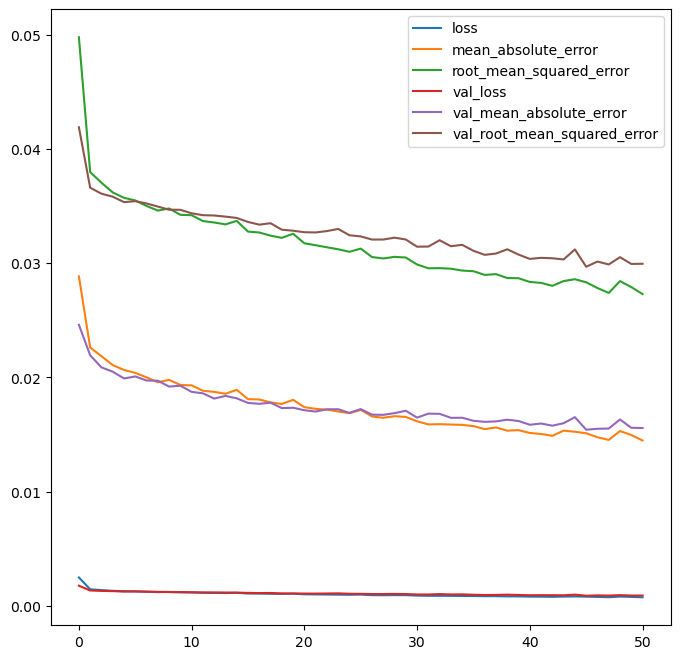

In [853]:
d1=pd.DataFrame(history.history)
d1.plot(figsize=(8,8))

In [854]:
model.save('neural_network.h5')
model

## Create xgboost model that get the one before last layer from the NN

In [855]:
# Load the trained model and extract the intermediate outputs of the layers
nn_model = tf.keras.models.load_model('neural_network.h5')
intermediate_layer_model = tf.keras.Model(inputs=nn_model.input, outputs=nn_model.layers[-2].output)
GB_X_train = intermediate_layer_model.predict(X_train)
GB_X_val = intermediate_layer_model.predict(X_val)
nn_model.layers[-2].output
GB_X_train.shape, GB_X_val.shape

1689/1689 [==============================] - 17s 10ms/step


((216100, 58), (54025, 58))

In [856]:
type(GB_X_train), max(GB_X_train[2])  

(numpy.ndarray, 0.21074638)

In [857]:
GB_X_train = np.concatenate((GB_X_train, GB_X_val))
GB_X_train.shape

(270125, 58)

In [858]:
y_train_for_xgb.shape

(270125, 1)

In [859]:
# Create the XGBoost regressor
GB_regressor = xgb.XGBRegressor(objective = 'reg:squarederror', learning_rate = 0.1, max_depth = 8, n_estimators = 50)

# Fit the regressor to the training data
GB_regressor.fit(GB_X_train, y_train_for_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [860]:
# # Make predictions on the validation set
# GB_y_pred_val = GB_regressor.predict(GB_X_val)

# # Calculate the mean squared error
# mse_GB = mean_squared_error(y_val, GB_y_pred_val)
# r2_GB = r2_score(y_val,GB_y_pred_val)
# print('----XGB Regression - validation----')
# print(f'MSE of XGB with XGB: {mse_GB}')
# print(f'R2 Score of XGB with XGB: {r2_GB}')

In [861]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(GB_X_train, y_train_for_xgb)

DecisionTreeRegressor()

# Testing

In [862]:
# fit scaler to revert y data to original scale
ms.fit(Original_y_train)

MinMaxScaler()

In [863]:
X_test.shape

TensorShape([30016, 29])

In [864]:
y_test = ms.inverse_transform(y_test)
pred = ms.inverse_transform(pred)

y_test, pred

(array([[ 7366.],
        [64831.],
        [ 6195.],
        ...,
        [56991.],
        [ 3149.],
        [ 9707.]]),
 array([[ 7067.525 ],
        [70992.3   ],
        [ 6908.2695],
        ...,
        [65803.73  ],
        [10263.284 ],
        [ 9070.01  ]], dtype=float32))

In [883]:
model.evaluate(data_te_batches)

118/118 [==============================] - 2s 16ms/step - loss: 8.7052e-04 - mean_absolute_error: 0.0154 - root_mean_squared_error: 0.0295


[0.000870517804287374, 0.015360978431999683, 0.02950453944504261]

In [884]:
score_dict={}

for reg in [model]:
    
    pred=reg.predict(data_tre_batches)
    pred = ms.inverse_transform(pred)
    
    print(pred)
        
    print("-"*50)
    
    print(f"R2 Score : {r2_score(y_test,pred)}")
    print(f"Mean Absolute Error Score : {mean_absolute_error(y_test,pred)}")
    print(f"Mean Sqaured Error Score : {mean_squared_error(y_test,pred)}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_test,pred, squared=False)}")
    
    
    score_dict['NN']={
        "R2 Score":r2_score(y_test,pred),
        "Mean Absolute Error Score":mean_absolute_error(y_test,pred),
        "Mean Squared Error Score":mean_squared_error(y_test,pred),
        "Root Mean Squared Error": mean_squared_error(y_test,pred, squared=False)
    }
    
    print("-"*50)

118/118 [==============================] - 2s 15ms/step
[[ 5840.778 ]
 [70522.46  ]
 [ 7472.997 ]
 ...
 [66237.66  ]
 [ 6841.1445]
 [ 9211.856 ]]
--------------------------------------------------
R2 Score : 0.9782545394212524
Mean Absolute Error Score : 1742.2113118405534
Mean Sqaured Error Score : 11198028.642221002
Root Mean Squared Error: 3346.34556527281
--------------------------------------------------


In [885]:
y_test, pred

(array([[ 7366.],
        [64831.],
        [ 6195.],
        ...,
        [56991.],
        [ 3149.],
        [ 9707.]]),
 array([[ 5840.778 ],
        [70522.46  ],
        [ 7472.997 ],
        ...,
        [66237.66  ],
        [ 6841.1445],
        [ 9211.856 ]], dtype=float32))

In [886]:
r2_score(y_test,pred), mean_squared_error(y_test,pred), mean_absolute_error(y_test,pred), mean_squared_error(y_test,pred, squared=False)

(0.9782545394212524, 11198028.642221002, 1742.2113118405534, 3346.34556527281)

In [887]:
pred

array([[ 5840.778 ],
       [70522.46  ],
       [ 7472.997 ],
       ...,
       [66237.66  ],
       [ 6841.1445],
       [ 9211.856 ]], dtype=float32)

In [888]:
ms.inverse_transform(pred)

array([[6.6245043e+08],
       [7.9985172e+09],
       [8.4757350e+08],
       ...,
       [7.5125432e+09],
       [7.7591002e+08],
       [1.0447914e+09]], dtype=float32)

In [889]:
table_norm_nn = pd.DataFrame({'Real value':np.squeeze((y_test)),
                              'Predict value':np.squeeze((pred)),
                              'Difference':(np.squeeze((y_test))-np.squeeze((pred)))})
table_norm_nn

,Real value,Predict value,Difference
0,7366.0,5840.777832,1525.222168
1,64831.0,70522.460938,-5691.460938
2,6195.0,7472.997070,-1277.997070
3,60160.0,63122.695312,-2962.695312
4,6578.0,7377.476562,-799.476562
...,...,...,...
30011,80458.0,57353.210938,23104.789062
30012,4048.0,4399.420898,-351.420898
30013,56991.0,66237.656250,-9246.656250
30014,3149.0,6841.144531,-3692.144531


In [872]:
# Calculate success rate - by norm variables
success_rate = 0.35
count = 0

for diff, real in zip(table_norm_nn["Difference"], table_norm_nn["Real value"]):
    if (np.abs(diff) <= real *(success_rate)).any(): #Todo: why we did this check? I think we need better result 
        count += 1
#         print("{:.0f} < {:.0f}".format(np.abs(diff), real *(success_rate)))
    
    accuracy_nn = (count/X_test.shape[0])*100
    
print("For STD:", "{:.3f}".format(y_test.std()),
      "\nSum of good prediction:", count, "from total testing predict:", y_test.shape[0],
      "\nSuccess rate:", "{:.3f}".format(accuracy_nn), "%")

For STD: 22692.716 
Sum of good prediction: 0 from total testing predict: 30016 
Success rate: 0.000 %


In [892]:
GB_X_test = intermediate_layer_model.predict(X_test)

# Make predictions on the validation set
GB_y_pred_test = GB_regressor.predict(GB_X_test)

# Calculate the mean squared error
GB_y_pred_test = ms.inverse_transform(GB_y_pred_test.reshape(-1, 1))
mse_GB = mean_squared_error(y_test, GB_y_pred_test)
r2_GB = r2_score(y_test,GB_y_pred_test)
print('\n----XGB Regression - validation----\n')
print(f'MSE of XGB with XGB: {mse_GB}\n')
print(f'R2 Score of XGB with XGB: {r2_GB}\n')

score_dict['XGB']={
    "R2 Score":r2_score(y_test,GB_y_pred_test),
    "Mean Absolute Error Score":mean_absolute_error(y_test,GB_y_pred_test),
    "Mean Squared Error Score":mean_squared_error(y_test,GB_y_pred_test),
    "Root Mean Squared Error": mean_squared_error(y_test,GB_y_pred_test, squared=False)
}

938/938 [==============================] - 6s 6ms/step

----XGB Regression - validation----

MSE of XGB with XGB: 11011909.014613489

R2 Score of XGB with XGB: 0.9786159652716749



In [896]:
mean_squared_error(y_test,GB_y_pred_test), mean_squared_error(y_test, GB_y_pred_test), score_dict['XGB']

(11011909.014613489,
 11011909.014613489,
 {'R2 Score': 0.9786159652716749,
  'Mean Absolute Error Score': 1752.7057334354945,
  'Mean Squared Error Score': 11011909.014613489,
  'Root Mean Squared Error': 3318.4196561938165})

In [890]:
GB_X_test = intermediate_layer_model.predict(X_test)


DT_y_pred_test = DT.predict(GB_X_test)

DT_y_pred_test = ms.inverse_transform(DT_y_pred_test.reshape(-1, 1))
mse_DT_test = mean_squared_error(y_test, DT_y_pred_test)
r2_DT_test = r2_score(y_test,DT_y_pred_test)
print('----Decision Tree Regression - validation----')
print(f'MSE of DT with DT: {mse_DT_test}')
print('R2 Score of DT with DT', r2_DT_test)

score_dict['DT']={
    "R2 Score":r2_score(y_test,DT_y_pred_test),
    "Mean Absolute Error Score":mean_absolute_error(y_test,DT_y_pred_test),
    "Mean Squared Error Score":mean_squared_error(y_test,DT_y_pred_test),
    "Root Mean Squared Error": mean_squared_error(y_test,DT_y_pred_test, squared=False)
}

938/938 [==============================] - 6s 6ms/step
----Decision Tree Regression - validation----
MSE of DT with DT: 20209998.360368554
R2 Score of DT with DT 0.9607541883769657


# Results

In [893]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values("R2 Score",ascending=False)
score_pd

,R2 Score,Mean Absolute Error Score,Mean Squared Error Score,Root Mean Squared Error
XGB,0.978616,1752.705733,1.101191e+07,3318.419656
NN,0.978255,1742.211312,1.119803e+07,3346.345565
DT,0.960754,2293.920610,2.021000e+07,4495.553176


In [876]:
pred1=model.predict(X_test)

938/938 [==============================] - 7s 8ms/step


<AxesSubplot:ylabel='diff'>

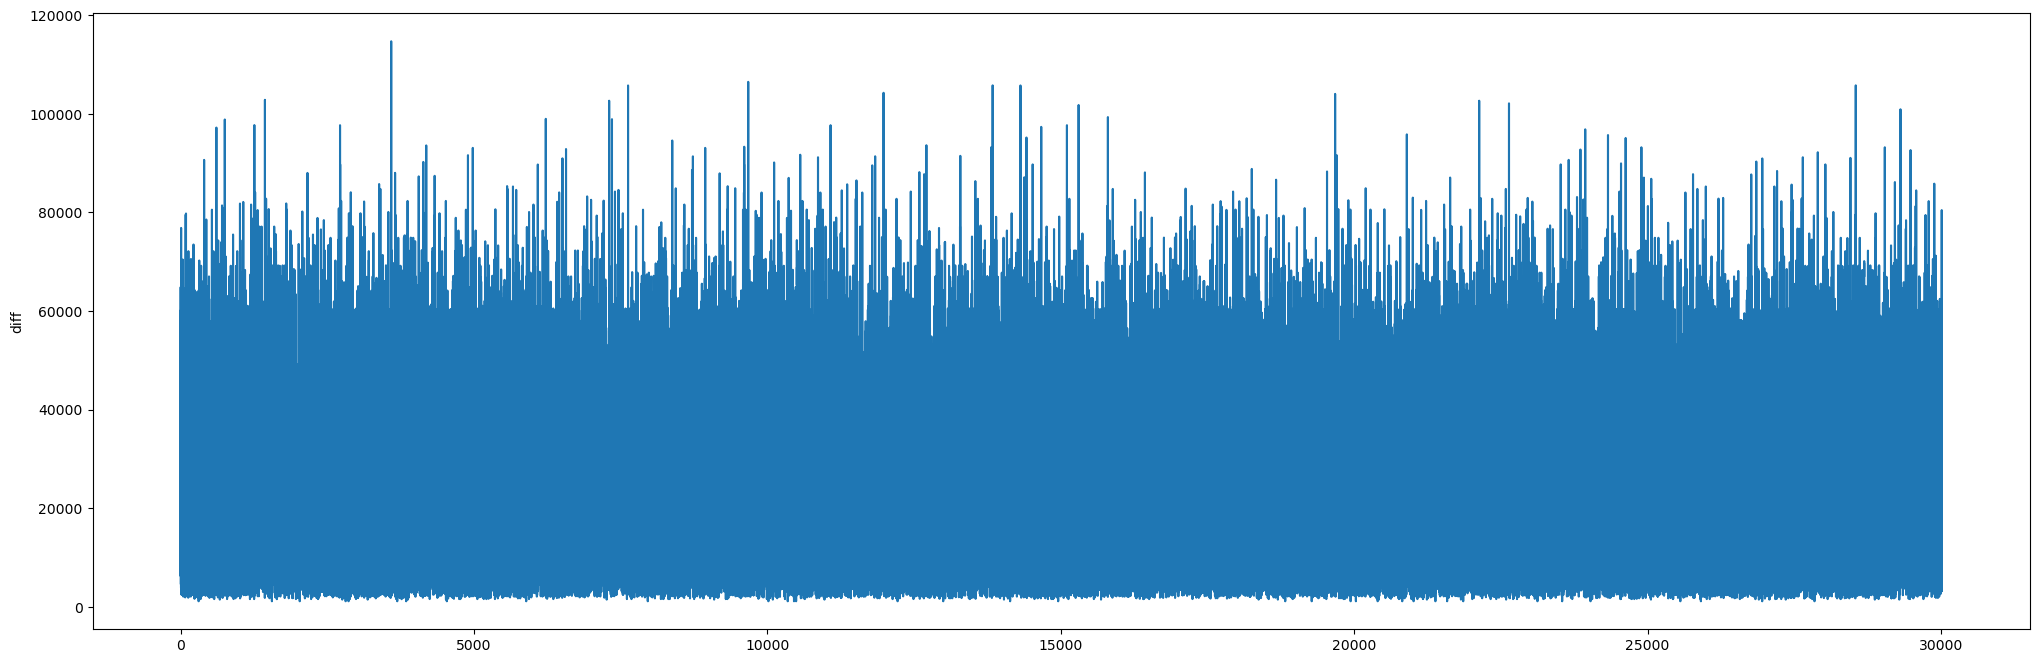

In [877]:
res=pd.DataFrame({"pred":pred1.ravel(),"y_test":y_test.ravel(),"diff":abs(pred1.ravel()-y_test.ravel())})

plt.figure(figsize=(25,8))
sns.lineplot(data=res['diff'])

<Figure size 1500x800 with 0 Axes>

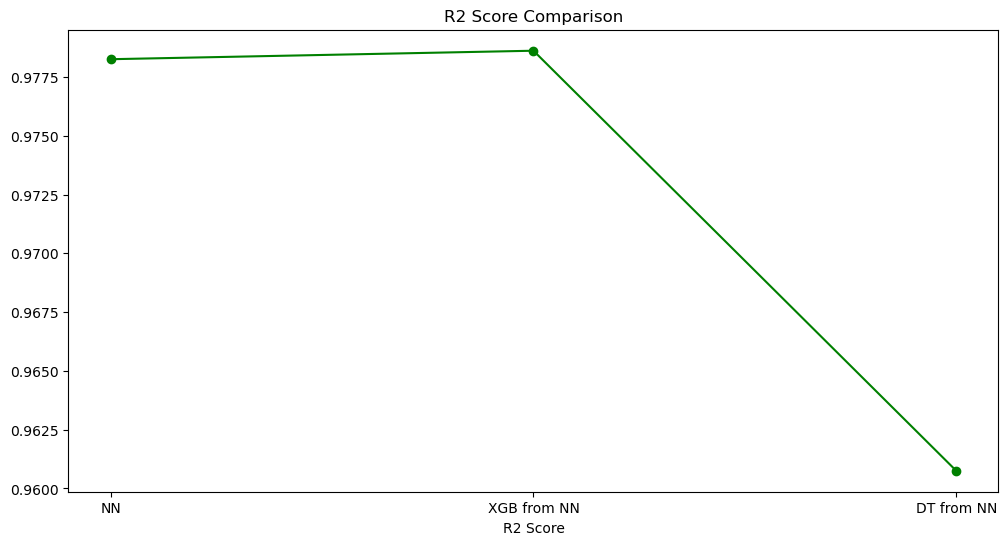

In [907]:
plt.figure(figsize=(15,8))
# Data of R2
labels = ['NN', 'XGB from NN', 'DT from NN']
data = [0.978255, r2_GB, r2_DT_test]

plt.figure(figsize=(12,6))
# Create the plot
plt.plot(labels, data, color='green', marker='o')

# Add a title and axis labels
plt.title('R2 Score Comparison')
plt.xlabel('R2 Score')


# Show the plot
plt.show()

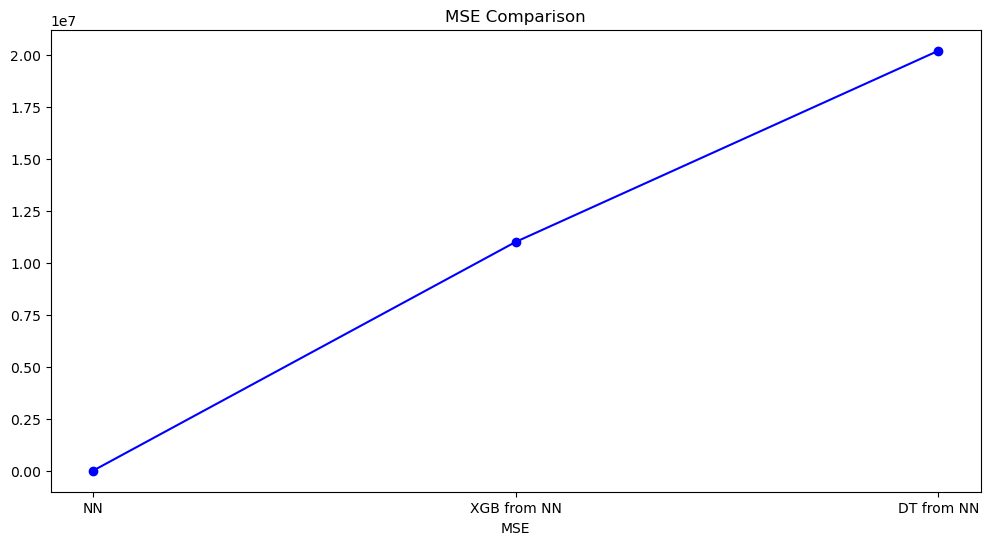

In [906]:
# Data of MSE
labels = ['NN', 'XGB from NN', 'DT from NN']
data = [1742.2113118405534, mse_GB, mse_DT_test]

plt.figure(figsize=(12,6))
# Create the plot
plt.plot(labels, data, color='blue', marker='o')

# Add a title and axis labels
plt.title('MSE Comparison')
plt.xlabel('MSE')


# Show the plot
plt.show()

In [880]:
pred.shape, pred

((30016, 1),
 array([[0.04175508],
        [0.61204976],
        [0.05614626],
        ...,
        [0.57427084],
        [0.05057526],
        [0.07147769]], dtype=float32))

In [881]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, pred)
mse

949696335.4253778

In [882]:
r2_score(y_test,pred)

-0.8442160565573977